<div style="text-align:center"><span style="font-size:2em; font-weight: bold;">Lecture 4—Object oriented programming</span></div>

# Programming: Pandas

* [Introduction to Pandas](lec4files/03.00-Introduction-to-Pandas.ipynb)
* [Introducing Pandas Objects](lec4files/03.01-Introducing-Pandas-Objects.ipynb)
* [Data Indexing and Selection](lec4files/03.02-Data-Indexing-and-Selection.ipynb)
* [Missing Values](lec4files/03.04-Missing-Values.ipynb)
* [Concat And Append](lec4files/03.06-Concat-And-Append.ipynb)
* [Merge and Join](lec4files/03.07-Merge-and-Join.ipynb)
* [Aggregation and Grouping](lec4files/03.08-Aggregation-and-Grouping.ipynb)
* [Working With Strings](lec4files/03.10-Working-With-Strings.ipynb)
* [Working with Time Series](lec4files/03.11-Working-with-Time-Series.ipynb)
* [Performance Eval and Query](lec4files/03.12-Performance-Eval-and-Query.ipynb)
* [Further Resources](lec4files/03.13-Further-Resources.ipynb)


## Examples

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.read_csv('BWGHT.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'BWGHT.csv'

In [ ]:
df = pd.read_csv('BWGHT.csv')

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df['bwght']

In [ ]:
mydict = {'a':1,'b':2,'c':3}
mydict[['a','b']]

In [ ]:
df[['cigs','faminc']]

In [ ]:
df.iloc[0:5,2:6]

In [ ]:
x = df[['cigs','faminc']]
y = df['bwght']
pd.concat([y,x],axis=1)

In [ ]:
df.groupby(['white']).mean()

In [ ]:
df.groupby(['parity','male']).median()

In [ ]:
df['intercept'] = 1
x = df[['intercept','cigs','faminc']]
y = df['bwght']
np.linalg.solve(x.T@x,x.T@y)

# Topic: Object-oriented programming	

## Benefits

**Instantiation**

Being able to make instances of something. Suppose you have a new data structure. You want to define the structure and make instances given particular data sets. This can be accomplished with classes. You make a general class, then when faced with a data set, you make a new instance. This ties into the second benefit of object-orientation which is encapsulation

**Encapsulation**

Being able to combine multiple data points into a single object which will always have the same naming conventions. This allows us to define custom functions which work on a class and which all the instances of that class will have access to. For instance, in pandas, all data sets which would normally just be numpy matrices have dedicated column names attached to them. This allows us to query for the column names and guarantees that something will be there for every data set. 

**Inheritance**

Suppose you wanted to make a panel data frame. This means that you need to create a bunch of panel functions and features, but if you didn't have inheritance, you would have to build this completely from scratch rewriting much of the pandas DataFrame code. With inheritance, you can simply extend the DataFrame class and start writing the new features and functions.

## Example

In [ ]:
class A:
    def __init__(self,name):
        self.name = name
    def print_name(self):
        print('A object\'s name is: {0}'.format(self.name))

In [ ]:
A('Jason')

In [ ]:
jp = A('Jason')
jp.name

In [ ]:
jp

In [ ]:
jp.print_name()

In [ ]:
miles = A('Miles')
miles.print_name()

In [ ]:
class B(A):
    def __init__(self,name,job):
        super(B,self).__init__(name)
        #self.name = name
        self.job = job
    def print_name_and_job(self):
        print('{0}\'s job is: {1}'.format(self.name,self.job))

In [ ]:
jp = B('jason','teacher')
jp.print_name_and_job()

In [ ]:
jp.name

In [ ]:
jp.job

In [ ]:
jp.print_name()

In [ ]:
mc = B('miles','actor')
mc.name

In [ ]:
mc.job

In [ ]:
mc.print_name()

In [ ]:
mc.print_name_and_job()

# Data Science: Linear model	
Our first goal is to understand the variance of $\hat\beta$. To do this, we will combine the formula for $\hat\beta$ with the linear modeling equation, $y=\mathbf X\beta+e$:
$$\begin{align}
\hat\beta&=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'y\\
&=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'\mathbf X\beta+\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'e\\
&=\beta+\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'e\\
\hat\beta-\beta&=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'e
\end{align}$$
Then we can define the variance:
$$\text{Var}(\hat\beta\vert\mathbf X)=\text{E}\left[\left(\hat\beta-\beta\right)\left(\hat\beta-\beta\right)'\vert\mathbf X\right]$$
This is true so long as $\text{E}(\hat\beta)=\beta$. I.e., when there is no endogeneity. Notice how our derived equation fits neatly into this definition. 
$$\text{Var}(\hat\beta\vert\mathbf X)=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'\text{E}\left[ee'\vert\mathbf X\right]\mathbf X\left(\mathbf X'\mathbf X\right)^{-1}$$
So we have our general formula for the variance. The OLS assumptions (no heteroskedasticity, no autocorrelation) imply in matrix form that $\text{E}\left[ee'\vert\mathbf X\right]=\sigma^2\mathbf I_n$. Now we can simply our variance as follows:
$$\begin{align}
\text{Var}(\hat\beta\vert\mathbf X)&=\sigma^2\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'\mathbf I_n\mathbf X\left(\mathbf X'\mathbf X\right)^{-1}\\
 &=\sigma^2\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X'\mathbf X\left(\mathbf X'\mathbf X\right)^{-1}\\
 &=\sigma^2\left(\mathbf X'\mathbf X\right)^{-1}
\end{align}$$
So we can define the OLS variance estimator:
$$\hat{\text{Var}}(\hat\beta)_{\text{OLS}}=s^2\left(\mathbf X'\mathbf X\right)^{-1}$$
where $s^2=(n-r)^{-1}\sum_{i=1}^n\hat e_i^2$
If we want to only assume no autocorrelation then $\text{E}\left[ee'\vert\mathbf X\right]=\text{diag}\left( \sigma_i^2\right)$ and the variance becomes:
$$\hat{\text{Var}}(\hat\beta)_{\text{White}}=\left(\mathbf X'\mathbf X\right)^{-1}\mathbf X' \text{diag}\left(\hat{e}^2\right)\mathbf X\left(\mathbf X'\mathbf X\right)^{-1}$$
t-statistics can be defined by:
$$t_{\hat\beta}=\hat\beta\circ\text{diag}\left(\sqrt{\hat{\text{Var}}(\hat\beta)^{-1}}\right)$$
and p-values can similarly be defined:
$$p_{\hat\beta}=2\Phi(-\vert t_{\hat\beta}\vert)$$

In [ ]:
df['(intercept)'] = 1
x = df[['(intercept)','cigs','faminc']]
y = df['bwght']
b = np.linalg.solve(x.T@x,x.T@y)
e = y-x@b
vb = e.var()*np.linalg.inv(x.T@x)
se = np.sqrt(np.diagonal(vb))
tstat = b/se
tstat

In [ ]:
import scipy.stats as sps

class linear_model:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.b = np.linalg.solve(x.T@x,x.T@y)
        e = y-x@self.b
        self.vb = self.vcov_b(e)
        self.se = np.sqrt(np.diagonal(self.vb))
        self.t = self.b/self.se
        self.p = 2*sps.norm.cdf(-np.abs(self.t))
        self.rsq = 1-e.var()/y.var()
    def vcov_b(self,e):
        x = self.x
        return e.var()*np.linalg.inv(x.T@x)
class white(linear_model):
    def vcov_b(self,e):
        x = self.x
        meat = np.diagflat(e.values**2)
        bread = np.linalg.solve(x.T@x,x.T)
        sandwich = bread@meat@bread.T
        return sandwich
class newey(linear_model):
    def vcov_b(self,e):
        x = self.x
        sig2 = (e**2).mean()
        sig_1 = (e[1:]*e[:-1]).mean()
        meat = ??
        bread = np.linalg.solve(x.T@x,x.T)
        sandwich = bread@meat@bread.T
        return sandwich

In [ ]:
df['(intercept)'] = 1
x = df[['(intercept)','cigs','faminc']]
y = df['bwght']
linear_model(x,y).p

In [ ]:
white(x,y).p

In [ ]:
linear_model(x,y).rsq

In [ ]:
white(x,y).rsq

# Programming challenges 

## Package structure

Consider how you would organize a data science package. What classes would you use? How would the inheritance structure work?


## Audioactive decay

Start with $x_0 = 1$. Now for each character, count the number of occurances. List the count and then the number. So we start with one $1$: $x_1=11$. Now we have two $1$s: $x_2=21$. The sequence continues:

```
1
11
21
1211
111221
312211
13112221
1113213211
31131211131221
```

Print the first 15 rows of this sequence.

In [ ]:
n = 1
count = 0
for i in str(n):
    

In [ ]:
list('111221')

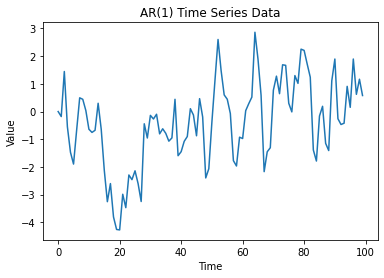

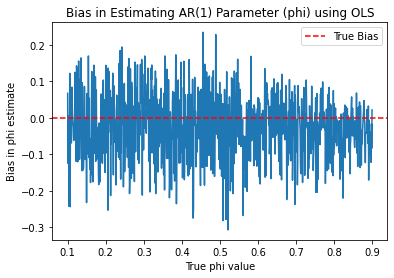

In [4]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

def generate_ar1(phi, sigma, n_samples):
    """
    Generate data from an AR(1) model.

    Parameters:
    phi (float): Autoregressive parameter
    sigma (float): Standard deviation of the white noise error
    n_samples (int): Number of samples to generate

    Returns:
    np.ndarray: Generated AR(1) time series data
    """
    # Generate white noise error terms
    epsilon = np.random.normal(0, sigma, n_samples)

    # Initialize the time series array
    ar1_data = np.zeros(n_samples)

    # Generate data using the AR(1) formula
    for t in range(1, n_samples):
        ar1_data[t] = phi * ar1_data[t-1] + epsilon[t]

    return ar1_data

# AR(1) parameters
phi = 0.7  # Autoregressive parameter
sigma = 1.0  # Standard deviation of the white noise error

# Number of samples to generate
n_samples = 100

# Generate AR(1) data
ar1_data = generate_ar1(phi, sigma, n_samples)

# Plot the generated AR(1) data
plt.plot(ar1_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Time Series Data')
plt.show()


# Function to estimate phi using OLS
def estimate_phi_ols(data):
    X = data[:-1]  # Previous values (lag 1)
    y = data[1:]   # Current values
    X = np.column_stack((np.ones(len(X)), X))
    ols_estimates = np.linalg.inv(X.T @ X) @ X.T @ y
    return ols_estimates[1]  # Extract the autoregressive parameter (phi)

# Simulation parameters
num_simulations = 1000  # Number of simulations
phi_values = np.linspace(0.1, 0.9, num_simulations)  # True phi values to simulate

# Initialize arrays to store results
estimated_phi_values = np.zeros(num_simulations)

# Run the simulation
for i in range(num_simulations):
    # Generate AR(1) data with the current phi value
    ar1_data = generate_ar1(phi_values[i], sigma, n_samples)
    
    # Estimate phi using OLS
    estimated_phi_values[i] = estimate_phi_ols(ar1_data)

# Calculate the bias in phi estimates
bias = estimated_phi_values - phi_values

# Plot the bias in phi estimates
plt.plot(phi_values, bias)
plt.axhline(y=0, color='r', linestyle='--', label='True Bias')
plt.xlabel('True phi value')
plt.ylabel('Bias in phi estimate')
plt.title('Bias in Estimating AR(1) Parameter (phi) using OLS')
plt.legend()
plt.show()


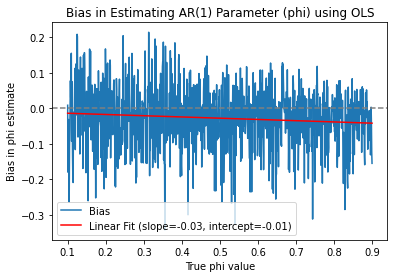

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to estimate phi using OLS
def estimate_phi_ols(data):
    X = data[:-1]  # Previous values (lag 1)
    y = data[1:]   # Current values
    X = np.column_stack((np.ones(len(X)), X))
    ols_estimates = np.linalg.inv(X.T @ X) @ X.T @ y
    return ols_estimates[1]  # Extract the autoregressive parameter (phi)

# Simulation parameters
num_simulations = 1000  # Number of simulations
phi_values = np.linspace(0.1, 0.9, num_simulations)  # True phi values to simulate

# Initialize arrays to store results
estimated_phi_values = np.zeros(num_simulations)

# Run the simulation
for i in range(num_simulations):
    # Generate AR(1) data with the current phi value
    ar1_data = generate_ar1(phi_values[i], sigma, n_samples)
    
    # Estimate phi using OLS
    estimated_phi_values[i] = estimate_phi_ols(ar1_data)

# Calculate the bias in phi estimates
bias = estimated_phi_values - phi_values

# Fit a linear regression to the bias and true phi values
slope, intercept, r_value, _, _ = linregress(phi_values, bias)

# Plot the bias in phi estimates and the linear fit
plt.plot(phi_values, bias, label='Bias')
plt.plot(phi_values, intercept + slope * phi_values, 'r', label=f'Linear Fit (slope={slope:.2f}, intercept={intercept:.2f})')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('True phi value')
plt.ylabel('Bias in phi estimate')
plt.title('Bias in Estimating AR(1) Parameter (phi) using OLS')
plt.legend()
plt.show()
